In [54]:

import numpy as np
import pandas as pd

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline


In [7]:
train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")


In [8]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [9]:
test.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [11]:
train.shape

(60000, 2)

In [14]:
img=image.load_img('train/1.png',grayscale=True,target_size=(28,28,1))

C:\Users\Guhan Ramachandran\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [15]:
img

In [16]:
img.size

(28, 28)

In [17]:
img_arr = image.img_to_array(img)

In [19]:
img_arr.shape

(28, 28, 1)

In [20]:
np.array(img_arr)

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [26]:
train_images = []
for i in range(1,len(train)-30000):
    img = image.load_img('train/' + str(i) + '.png',grayscale=True,target_size=(28,28,1))
    img_arr = image.img_to_array(img)
    train_images.append(img_arr)
X = np.array(train_images)

In [27]:
X.shape

(29999, 28, 28, 1)

In [28]:
train.label.values

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [29]:
y=train.label.values

In [30]:
y=y[0:29999]

In [33]:
y[20]

3

In [34]:
y=to_categorical(y)

In [35]:
y[20]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [37]:
x_train.shape, x_test.shape

((23999, 28, 28, 1), (6000, 28, 28, 1))

In [40]:
y_train.shape, y_test.shape

((23999, 10), (6000, 10))

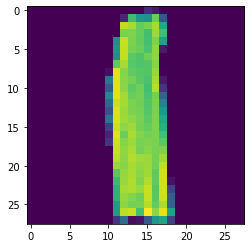

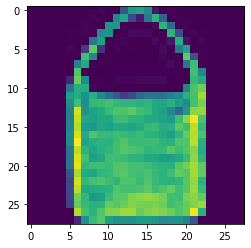

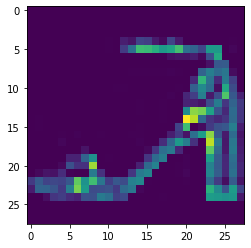

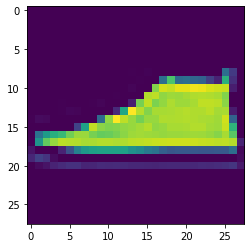

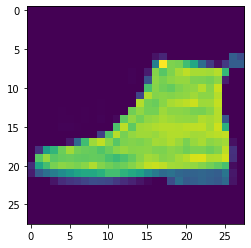

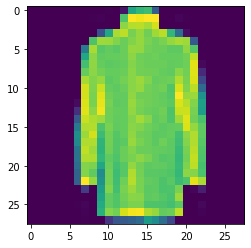

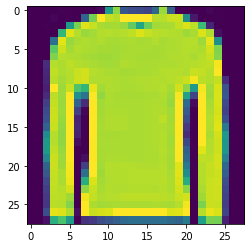

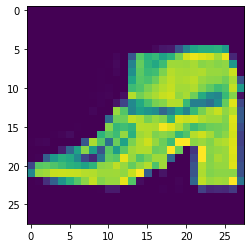

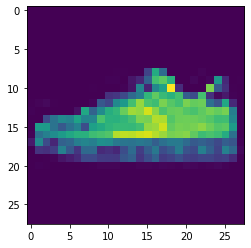

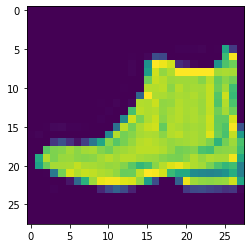

In [41]:
from matplotlib import pyplot as plt
for i in range(10):
    plt.imshow(x_train[i], interpolation='nearest')
    plt.show()

In [42]:
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten

In [44]:
x_train.shape, y_train.shape

((23999, 28, 28, 1), (23999, 10))

In [45]:
model = Sequential()

In [46]:
model.add(Conv2D(input_shape=(28,28,1),filters=16, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, kernel_initializer='he_normal',activation='elu'))
model.add(BatchNormalization())
model.add(Dense(10,kernel_initializer='he_normal',activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 10)                5770      
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                1

In [48]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs=10, batch_size = 10, verbose=2)

Epoch 1/10
1680/1680 - 7s - loss: 0.8861 - categorical_accuracy: 0.7139 - val_loss: 0.5566 - val_categorical_accuracy: 0.8106 - 7s/epoch - 4ms/step
Epoch 2/10
1680/1680 - 6s - loss: 0.5829 - categorical_accuracy: 0.8051 - val_loss: 0.5366 - val_categorical_accuracy: 0.8146 - 6s/epoch - 4ms/step
Epoch 3/10
1680/1680 - 6s - loss: 0.5306 - categorical_accuracy: 0.8158 - val_loss: 0.4555 - val_categorical_accuracy: 0.8388 - 6s/epoch - 4ms/step
Epoch 4/10
1680/1680 - 6s - loss: 0.4956 - categorical_accuracy: 0.8308 - val_loss: 0.4412 - val_categorical_accuracy: 0.8447 - 6s/epoch - 4ms/step
Epoch 5/10
1680/1680 - 6s - loss: 0.4747 - categorical_accuracy: 0.8368 - val_loss: 0.4600 - val_categorical_accuracy: 0.8417 - 6s/epoch - 4ms/step
Epoch 6/10
1680/1680 - 6s - loss: 0.4591 - categorical_accuracy: 0.8430 - val_loss: 0.4518 - val_categorical_accuracy: 0.8403 - 6s/epoch - 4ms/step
Epoch 7/10
1680/1680 - 6s - loss: 0.4502 - categorical_accuracy: 0.8452 - val_loss: 0.4489 - val_categorical_acc

In [49]:
model.evaluate(x_train, y_train)

750/750 [==============================] - 2s 3ms/step - loss: 0.3846 - categorical_accuracy: 0.8626


[0.3845807611942291, 0.8625776171684265]

In [50]:
model.evaluate(x_test, y_test)

188/188 [==============================] - 0s 2ms/step - loss: 0.4445 - categorical_accuracy: 0.8457


[0.4445030391216278, 0.8456666469573975]

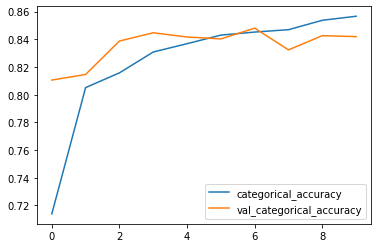

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['categorical_accuracy','val_categorical_accuracy'])

In [74]:
Test = pd.read_csv("test.csv")

In [75]:
Test

,id
0,60001
1,60002
2,60003
3,60004
4,60005
...,...
9995,69996
9996,69997
9997,69998
9998,69999


In [76]:
Test.shape

(10000, 1)

In [77]:
test_images = []
for i in range(60001,60001+len(Test)):
    img = image.load_img('test/' + str(i) + '.png',grayscale=True,target_size=(28,28,1))
    img_arr = image.img_to_array(img)
    test_images.append(img_arr)
test = np.array(test_images)

C:\Users\Guhan Ramachandran\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [81]:
test.shape

(10000, 28, 28, 1)

In [82]:
pred = model.predict_classes(test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

This function were removed in TensorFlow version 2.6. According to the keras in rstudio reference

update to

In [83]:
predict_x=model.predict(test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [71]:
classes_x[1]

2

In [84]:
output = pd.DataFrame()
output['id'] = Test['id']
output['label'] = classes_x

In [85]:
output.to_csv("Apparel_MNIST_result.csv",header=True,index=False)